In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

from data import PiDataset
from model import Generator

### Load data

In [2]:
# load data
X = np.load('pi_xs.npy')
Y = np.load('pi_ys.npy')
image_array = np.array(Image.open('sparse_pi_colored.jpg'))
rgb_values = image_array[X, Y]

### Set hyperparameters and create model

In [3]:
# set hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"

num_layers = 1
embedding_dim = 64
hidden_size = 64
num_heads = 8
num_items = [301, 301, 257, 257]
num_items_out = [300, 300, 256, 256, 256]
dropout_rate = 0.1
model = Generator(
    num_items, num_items_out, num_layers=num_layers, dropout_rate=dropout_rate,
    embedding_dim=embedding_dim, hidden_size=hidden_size, num_heads=num_heads, device=device)
epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

pi_dataset = PiDataset(X, Y, rgb_values, embedding_dim=embedding_dim, device=device)
pi_loader = torch.utils.data.DataLoader(pi_dataset, batch_size=64, shuffle=True)

# Train model

In [4]:
model.fit(pi_loader, criterion, optimizer)

epoch 1/100: loss: 26.723593216908128
epoch 21/100: loss: 18.46867904180213
epoch 41/100: loss: 16.418697405465043
epoch 61/100: loss: 15.330632861656479
epoch 81/100: loss: 14.728677689274654
loss: 14.299505994289737


### Generated image

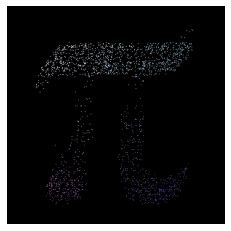

In [5]:
img_data = np.zeros((300, 300, 3), dtype=np.uint8)
for _ in range(100):
    noises = torch.randn(100000, 1, embedding_dim).to(device)
    q = model.generate(noises)
    img_data[q[:, 0], q[:, 1]] = q[:, 2:]

plt.axis('off')
plt.imshow(Image.fromarray(img_data))

### Source image

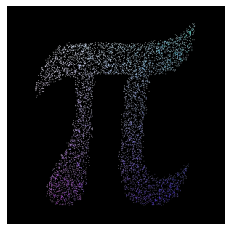

In [6]:
# source image
img_data = np.zeros((300, 300, 3), dtype=np.uint8)
img_data[X, Y] = rgb_values
plt.axis('off')
plt.imshow(Image.fromarray(img_data))